In [1]:
#  Required Install
!pip install librosa

In [2]:
#Import Dependencies
from pylab import *
import os
import pandas as pd
import librosa
import librosa.display
import glob

# Sample one audio File

[-5.2936412e-07  5.2245684e-07 -4.8367059e-07 ... -7.7196285e-07
  7.8327724e-07  0.0000000e+00] 22050


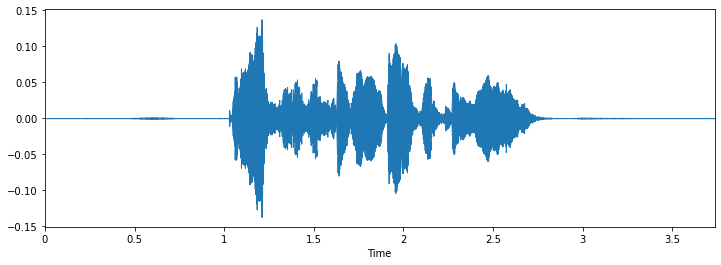

In [3]:
data, sampling_rate = librosa.load('../data/emotion_speech/03-01-06-01-02-02-02.wav')
plt.figure(figsize=(12, 4))

print(data, sampling_rate)
librosa.display.waveplot(data, sr=sampling_rate)

# Model

In [4]:
data = pd.read_csv('../data/audio_data.csv')

In [8]:
#Import Dependencies
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.layers  import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import metrics 
from tensorflow.keras.models import Sequential
from keras.utils import np_utils


In [9]:
X = np.array(data.feature.tolist())
y = np.array(data.label.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

In [10]:
num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
# model.fit(X, y, batch_size=32, epochs=5, validation_data=(val_x, val_y))